In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [103]:
dataset = pd.read_csv('appdata10.csv')

In [104]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [105]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [106]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [107]:
df = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [108]:
df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [109]:
plt.suptitle('Histogram of numercial columns', fontsize = 20)

Text(0.5, 0.98, 'Histogram of numercial columns')

<Figure size 432x288 with 0 Axes>

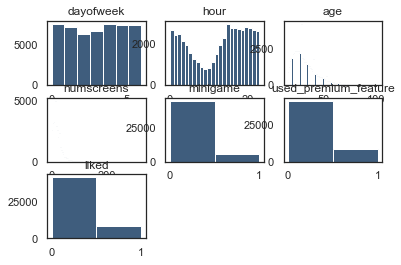

In [110]:
for i in range(1, df.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df.columns.values[i-1])
    
    vals = np.size(df.iloc[:, i-1].unique())
    
    plt.hist(df.iloc[:, i-1], bins = vals, color = '#3F5D7D')

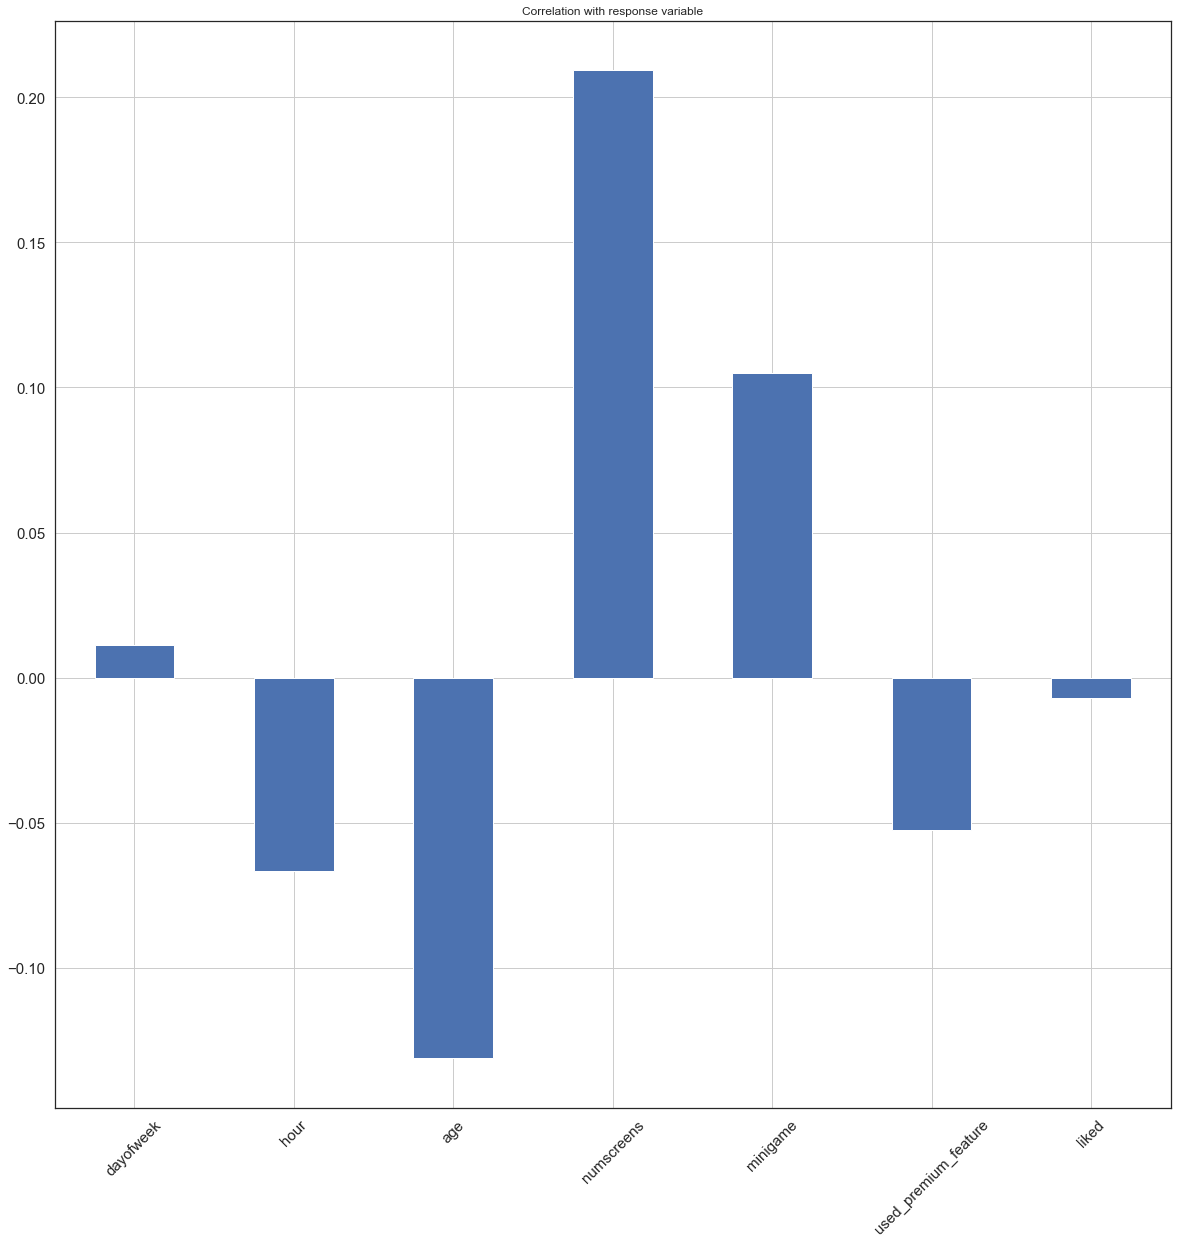

In [111]:
#CORRELATION WITH RESPONSE

df.corrwith(dataset.enrolled).plot.bar(figsize = (20,20),
                                      title = 'Correlation with response variable',
                                      fontsize = 15, rot = 45,
                                      grid = True)

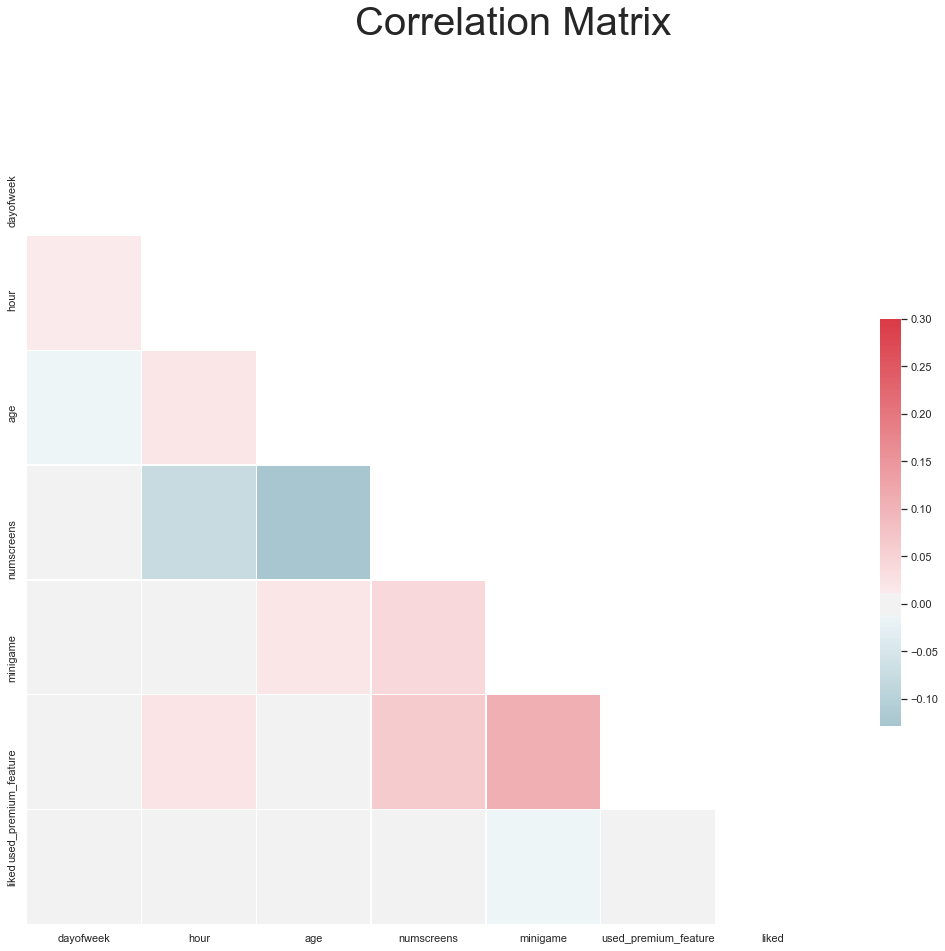

In [112]:
sn.set(style = 'white', font_scale = 1)

corr = df.corr()

mask = np.zeros_like(corr, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18, 15))
f.suptitle('Correlation Matrix', fontsize = 40)

cmap = sn.diverging_palette(220, 10, as_cmap = True)

sn.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center=0,
          square = True, linewidths = .5, cbar_kws={"shrink": .5})

In [113]:
#FEATURE ENGINEERING

dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [114]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]

In [115]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [116]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [117]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

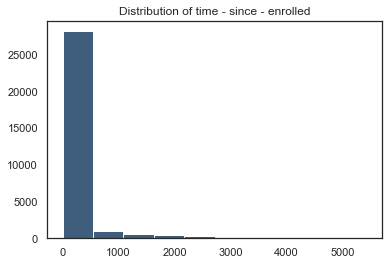

In [118]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of time - since - enrolled')
plt.show()

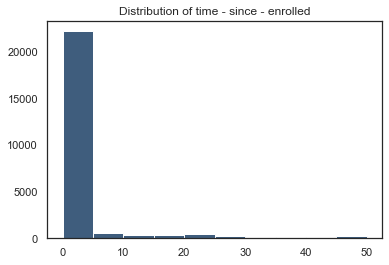

In [119]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 50])
plt.title('Distribution of time - since - enrolled')
plt.show()

In [120]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

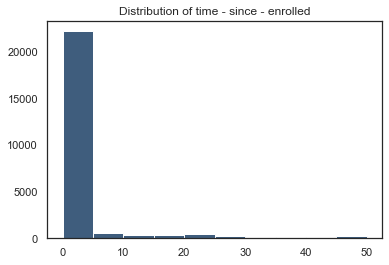

In [121]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 50])
plt.title('Distribution of time - since - enrolled')
plt.show()

In [122]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [123]:
#SCREENS FEATURE ENGINEERING

In [124]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [125]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [126]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

In [127]:
dataset['Other'] = dataset.screen_list.str.count(",")

In [128]:
dataset = dataset.drop(columns = ['screen_list'])

In [129]:
#FUNNELS

savings_screens = ["Saving1", 
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

In [130]:
dataset["SavingsCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns = savings_screens)

In [131]:
cm_screens = ["Credit1",
              "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]

dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns = cm_screens)

In [132]:
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]

dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns = cc_screens)

In [133]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns = loan_screens)

In [134]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [135]:
dataset.to_csv("new_appdata10.csv", index = False)

In [136]:
#MODEL BUILDING


import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

df = pd.read_csv("new_appdata10.csv")

In [137]:
#DATA PREPROCESSING

response = df["enrolled"]
df = df.drop(columns = 'enrolled')


In [138]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(df, response, test_size = 0.2, random_state=0)

In [139]:
train_identifier = x_train['user']
x_train = x_train.drop(columns = 'user')

test_identifier = x_test['user']
x_test = x_test.drop(columns = 'user')

In [140]:
#NORMALIZATION

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.transform(x_test))
x_train2.columns = x_train.columns.values
x_test2.columns = x_test2.columns.values

x_train2.index = x_train.index.values
x_test2.index = x_test2.index.values

In [141]:
x_train = x_train2
x_test = x_test2

In [142]:
#NORMALIZATION

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred = classifier.predict(x_test)

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [145]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.768

In [146]:
precision_score(y_test, y_pred)

0.7617422721798475

In [147]:
recall_score(y_test, y_pred)

0.7700892857142857

In [148]:
f1_score(y_test, y_pred)

0.7658930373360243

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv= 10)

In [151]:
print("accuracies %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()*2))

accuracies 0.767 (+/- 0.009)


In [152]:
#FORMATTING FINAL RESULTS

final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [153]:
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
